Copyright **`(c)`** 2023 Giovanni Squillero `<giovanni.squillero@polito.it>`  
[`https://github.com/squillero/computational-intelligence`](https://github.com/squillero/computational-intelligence)  
Free for personal or classroom use; see [`LICENSE.md`](https://github.com/squillero/computational-intelligence/blob/master/LICENSE.md) for details.  

# LAB9

Write a local-search algorithm (eg. an EA) able to solve the *Problem* instances 1, 2, 5, and 10 on a 1000-loci genomes, using a minimum number of fitness calls. That's all.

### Deadlines:

* Submission: Sunday, December 3 ([CET](https://www.timeanddate.com/time/zones/cet))
* Reviews: Sunday, December 10 ([CET](https://www.timeanddate.com/time/zones/cet))

Notes:

* Reviews will be assigned  on Monday, December 4
* You need to commit in order to be selected as a reviewer (ie. better to commit an empty work than not to commit)

In [1]:
from random import choices, randint, choice, random
from copy import deepcopy
from pprint import pprint
import matplotlib.pyplot as plt
import lab9_lib

In [ ]:
fitness = lab9_lib.make_problem(1)

In [2]:
def swap_element(el:int) ->int:
    return el -1 if el==1 else el+1

In [175]:
class individual:
    def __init__(self, N=None):
        if N is not None:
            self.genome=[randint(0,1) for i in range(N)]
            self.fitness=fitness(self.genome)
        else:
            self.genome=[]
            self.fitness=0
    
    def mutate(self, mr):
        mutated=deepcopy(self)
        if random()<mr:
            genome=deepcopy(self.genome)
            NUM_CHANGES=3
            for i in range(NUM_CHANGES):
                ran=randint(0,len(self.genome)-1)
                genome[ran]= swap_element(self.genome[ran])
            mutated.set_genome(genome)
            mutated.update_fitness()
        return mutated
    
    def update_fitness(self):
        self.fitness=fitness(self.genome)

    def set_genome(self, g:list):
        self.genome= g

    def get_genome(self)-> list:
        return self.genome
    
    def get_fitness(self)-> float:
        return self.fitness

def xover2(i1:individual, i2:individual, xr) ->individual:
    if random()<xr:
        i3=individual()
        p1=i1.get_genome()
        p2=i2.get_genome()
        g=[p1[i] if random() <= 0.5 else p2[i] for i in range(len(p1))]
        i3.set_genome(g)
        i3.update_fitness()
        return i3
    else:
        return max([i1,i2], key=lambda x: x.get_fitness())

def xover3(i1:individual, i2:individual) ->individual:
    i3=individual()
    p1=i1.get_genome()
    p2=i2.get_genome()
    cut=randint(0,len(p1)-1)
    g=p1[0:cut]+p2[cut:]
    i3.set_genome(g)
    i3.update_fitness()
    return i3

def tournament(population, SIZE)->list:
    TOURNAMENT_SIZE=6
    g=[]
    for i in range(int(SIZE)):
        g.append(max(choices(population, k=TOURNAMENT_SIZE), key= lambda x:x.get_fitness()))
    return g

0 0.557 1 0.574 2 0.593 3 0.608 4 0.618 5 0.643 6 0.651 7 0.661 8 0.672 9 0.683 10 0.696 11 0.709 12 0.725 13 0.731 14 0.744 15 0.759 16 0.761 17 0.776 18 0.783 19 0.795 20 0.804 21 0.81 22 0.828 23 0.83 24 0.835 25 0.842 26 0.849 27 0.855 28 0.865 29 0.867 30 0.872 31 0.878 32 0.884 33 0.89 34 0.895 35 0.898 36 0.904 37 0.91 38 0.914 39 0.919 40 0.924 41 0.926 42 0.93 43 0.933 44 0.935 45 0.94 46 0.941 47 0.943 48 0.948 49 0.949 50 0.953 51 0.956 52 0.957 53 0.959 54 0.961 55 0.962 56 0.964 57 0.967 58 0.967 59 0.97 60 0.971 61 0.971 62 0.974 63 0.974 64 0.976 65 0.976 66 0.977 67 0.979 68 0.979 69 0.979 70 0.981 71 0.982 72 0.983 73 0.983 74 0.984 75 0.985 76 0.985 77 0.985 78 0.985 79 0.986 80 0.986 81 0.987 82 0.987 83 0.987 84 0.988 85 0.988 86 0.989 87 0.989 88 0.99 89 0.99 90 0.99 91 0.99 92 0.99 93 0.99 94 0.99 95 0.99 96 0.99 97 0.99 98 0.99 99 0.99 100 0.99 101 0.99 102 0.99 103 0.99 104 0.99 105 0.99 106 0.991 107 0.992 108 0.992 109 0.992 110 0.992 111 0.992 112 0.992 113 0

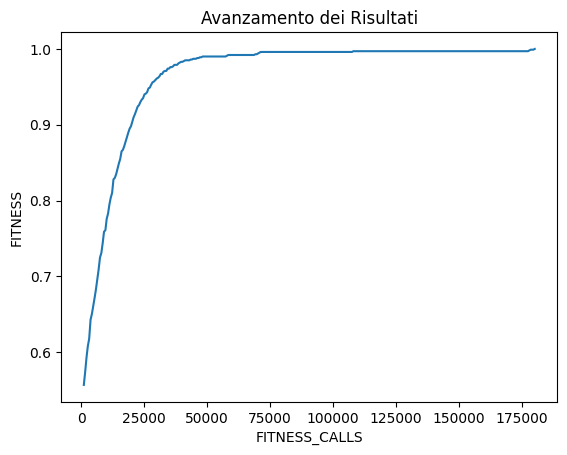

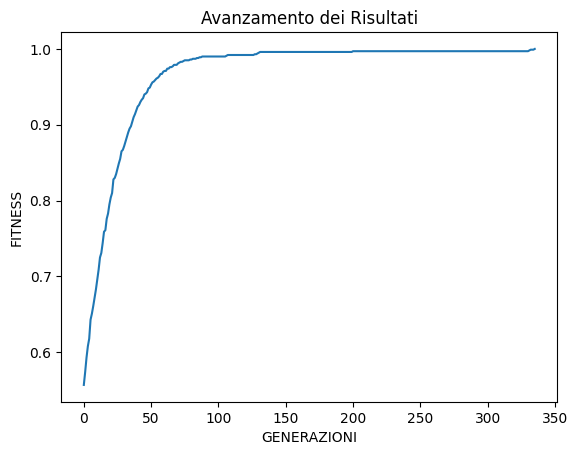

In [197]:
fitness = lab9_lib.make_problem(1)
POPULATION_SIZE=500
GENERATION_N=1000
DIMENSION=1000
MUTATION_RATE=0.6
XOVER_RATE=0.9
ELITE_SIZE=50

population=[individual(DIMENSION) for _ in range(POPULATION_SIZE)]
population.sort(key= lambda x:x.get_fitness() , reverse=True)
offspring=[]
x=[]
history=[]
generations=[]
for i in range(GENERATION_N):
    
    parents=tournament(population, POPULATION_SIZE/2)
    
    for j in range(1, len(parents)-1, 2):
    
        o1=max([xover2(parents[j-1],parents[j], XOVER_RATE),xover3(parents[j-1],parents[j])], key= lambda x:x.get_fitness())
        o1=max([o1.mutate(MUTATION_RATE),o1.mutate(MUTATION_RATE),o1.mutate(MUTATION_RATE),o1.mutate(MUTATION_RATE)],key= lambda x:x.get_fitness())
        offspring.append(o1)
        
            
    population= population[0:ELITE_SIZE]+ offspring
    
    population.sort(key= lambda x:x.get_fitness(), reverse=True)
    population=population[0:POPULATION_SIZE]
    offspring=[]
    
    x.append(fitness.calls)
    history.append(population[0].get_fitness())
    generations.append(i)
    if population[0].get_fitness()==1:
        break
    print(i,population[0].get_fitness(),sep=" ", end=" ")

print("Best fitness found: ",population[0].get_fitness()," Number of generations: ", i+1, "fitness calls: ", fitness.calls)


plt.plot(x, history)
plt.xlabel('FITNESS_CALLS')
plt.ylabel('FITNESS')
plt.title('Avanzamento dei Risultati')
plt.show()

plt.plot(generations, history)
plt.xlabel('GENERAZIONI')
plt.ylabel('FITNESS')
plt.title('Avanzamento dei Risultati')
plt.show()